<img src="logo_UCLA_blue_boxed.svg" alt="ucla logo" width="150" align="left"/>

### **MAE 150A - Intermediate Fluid Mechanics**

<hr />

# The Rayleigh problem and self-similarity

This notebook reviews the Rayleigh problem and the concept of self-similar flow

### First, set up the environment

In [1]:
using MAE150A

┌ Info: Recompiling stale cache file /Users/jeff/.julia/compiled/v1.2/MAE150A/A9IAL.ji for MAE150A [a017625c-406c-46ee-99d6-0fac6062339e]
└ @ Base loading.jl:1240


In [2]:
pyplot()
initialize_environment()

┌ Info: Recompiling stale cache file /Users/jeff/.julia/compiled/v1.2/PyPlot/oatAj.ji for PyPlot [d330b81b-6aea-500a-939a-2ce795aea3ee]
└ @ Base loading.jl:1240


In [5]:
using SpecialFunctions

### Set up functions for the solution of the Rayleigh problem

The self-similar velocity profile

In [54]:
F(η) = 1 - erf(η)
δ(ν,t) = 2*sqrt(ν*t)

δ (generic function with 1 method)

The velocity and vorticity. We set a default values of viscosity and wall velocity here, but they can be changed

In [55]:
u(y,t;ν = 1.0, U = 1.0) = U*F(y/δ(ν,t))

u (generic function with 1 method)

## Inspecting the flow solution
The velocity field that develops in the fluid by the impulsively-started flat plate is unsteady. This means, of course, that this velocity changes in time. Let's inspect this:

In [56]:
# These are just sample choices of viscosity and wall velocity. Others can be chosen!
ν = 1.0
U = 4.0

4.0

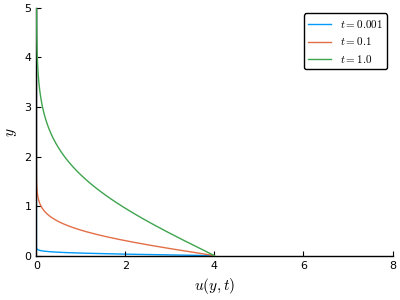

In [57]:
y = range(0,5,length=501)
plot(u.(y,0.001,ν=ν,U=U),y,xlim=(0,2U),ylim=(0,5),label=L"t = 0.001",legend=true,xlabel=L"u(y,t)",ylabel=L"y")
plot!(u.(y,0.1,ν=ν,U=U),y,xlim=(0,2U),ylim=(0,5),label=L"t = 0.1")
plot!(u.(y,1.0,ν=ν,U=U),y,xlim=(0,2U),ylim=(0,5),label=L"t = 1.0")

This velocity behaves as one might expect: it starts out at rest, with only the fluid near the wall ($y = 0$) in motion at the speed of the wall. As time progresses, more and more fluid is brought into motion by viscous stresses "dragging along" higher and higher regions of the fluid.

However, there is an aspect of this flow that is important to discuss. This velocity profile has the same **shape** at all times. What does this mean? 

### Revisiting Couette flow
Before we answer that question, let's remind ourselves of a more basic flow---steady Couette flow---and its velocity profile:

$$ u = Uy/h $$

where $h$ is the height of the gap between two parallel walls: the upper wall is moving at speed $U$ and the lower wall is stationary.

If we compare two different cases of Couette flow: one with a gap size $h = 1$ and wall speed $U = 1$ and another with $h = 3$ and $U = 6$, then we see the following two velocity profiles:

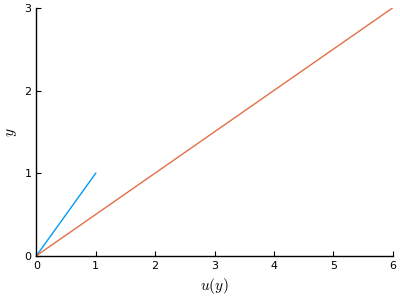

In [41]:
h = 1; U = 1
y = range(0,h,length=101)
plot(U*y/h,y,xlim=(0,U),ylim=(0,h),xlabel=L"u(y)",ylabel=L"y")
h = 3; U = 6
y = range(0,h,length=101)
plot!(U*y/h,y,xlim=(0,U),ylim=(0,h))

Obviously these profiles are different. However, the two geometries are the same shape---a gap between two walls---but with different heights. Also, their upper walls are both in the same motion, but with different velocities. Their differences in both respects can be "scaled out" of the solution. For this reason, we say that these two cases are **geometrically and dynamically similar** to each other, and their velocity profiles share a common form

$$ \dfrac{u}{U} = \dfrac{y}{h}$$

or

$$ F(\eta) = \eta$$

where $F = u/U$ and $\eta = y/h$.

Similarly, one could say the same thing about **steady Poiseuille flow** in a gap, in which the common shape is

$$F(\eta) = 4\eta(1 - \eta)$$

where $F = u/U_{max}$ and $\eta = y/h$.

### Back to the Rayleigh problem...
The Rayleigh problem also has similarity, but **not** between two different geometries. The Rayleigh problem only has one geometry---a semi-infinite region above a flat plate---with **no characteristic length** (like $h$ in Couette flow).

However, the flow itself "creates" its own characteristic length scale: the thickness of the layer of fluid with significant velocity. We know that this thickness $\delta$ should vary in time, and should be influenced by viscosity. By dimensional analysis, it is easy to show that this thickness must have the form

$$\delta = C \sqrt{\nu t}$$

where $C$ is a constant. The value of this constant depends on how we specifically define this thickness. For example, we might say that the layer is defined as all fluid whose velocity is greater than 1% of the wall velocity. It is conventional to choose $C = 2$, but this choice is not really important.

So this length scale, $\delta(t)$, becomes the crucial one for setting the dimensions of the flow. So from dimensional analysis we expect the velocity profile to have a common shape

$$ u/U = F(\eta)$$

where $\eta = y/\delta(t)$. Notice that time and distance are no longer separate independent variables; there is only **one** independent variable, formed from a combination of $y$ and $t$. We say that this type of flow is **self-similar**, because its similarity is not between different geometries, but with *itself at different times*.


This **self-similar** profile is shown here:

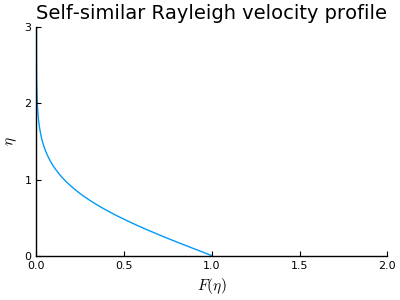

In [51]:
η = range(0,4,length=401)
plot(F.(η),y,xlim=(0,2),ylim=(0,3),xlabel=L"F(\eta)",ylabel=L"\eta",title="Self-similar Rayleigh velocity profile")

### The vorticity of the Rayleigh flow
The vorticity, like the velocity, is also self-similar. In this case, the shape is a half Gaussian.

In [60]:
Fp(η) = 2/sqrt(π)*exp(-η^2)
ω(y,t;ν=1.0,U=1.0) = U/δ(ν,t)*Fp(y/δ(ν,t))

ω (generic function with 3 methods)

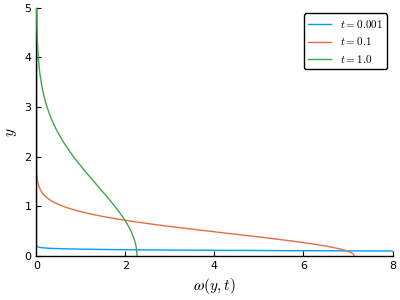

In [61]:
y = range(0,5,length=501)
plot(ω.(y,0.001,ν=ν,U=U),y,xlim=(0,2U),ylim=(0,5),label=L"t = 0.001",legend=true,xlabel=L"ω(y,t)",ylabel=L"y")
plot!(ω.(y,0.1,ν=ν,U=U),y,xlim=(0,2U),ylim=(0,5),label=L"t = 0.1")
plot!(ω.(y,1.0,ν=ν,U=U),y,xlim=(0,2U),ylim=(0,5),label=L"t = 1.0")

### Consequences of self-similarity